In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [2]:
#%matplotlib inline
#sns.set_style(style='whitegrid')
#sns.set_context(context='notebook')
#plt.rcParams['figure.figsize'] = (11,9.4)

#git_color = {
#    'Adelie':'#ff6602ff',
#    'Gentoo':'#0f7175ff',
#    'Chinstrap':'#c65dc9ff',
#    'Torgersen': '#955FC8', 
#    'Biscoe': '#94e2c3', 
#    'Dream': '#345469',
#}

In [3]:
preprocess_git_df = pd.read_csv('cp-10k-GH-GetRepos-V3 - Main.csv') # preprocessed Data
preprocess_git_df.head()

,ID,Unnamed: 1,Name,URL,Lang,Estrellas,Commits,Forks,Subs,Issues,Size,Create,Update,pushed_at,HR,FR,DR,8488726
0,1,NaN,grit,https://github.com/mojombo/grit,Ruby,1965,0XNaN,536,72,30,7954,2007-10-29T14:37:16Z,2023-05-26T17:01:46Z,2020-10-01T03:55:32Z,4:13:40 AM,6/2/2023,NaN,NaN
1,27,NaN,rubinius,https://github.com/rubinius/rubinius,C,3044,0XNaN,604,103,15,168069,2008-01-12T16:46:52Z,2023-05-31T19:42:48Z,2023-05-09T19:49:03Z,4:38:16 PM,6/2/2023,NaN,NaN
2,28,NaN,god,https://github.com/mojombo/god,Ruby,2204,0XNaN,521,87,432,2639,2008-01-13T05:16:23Z,2023-05-31T15:25:20Z,2022-01-12T14:06:16Z,4:38:17 PM,6/2/2023,NaN,NaN
3,42,NaN,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,1573,0XNaN,277,17,27,1208,2008-01-14T14:44:23Z,2023-04-19T10:32:14Z,2015-07-31T22:25:04Z,4:38:23 PM,6/2/2023,NaN,NaN
4,43,NaN,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,1024,0XNaN,324,10,35,1008,2008-01-14T14:51:56Z,2023-05-10T13:56:55Z,2017-03-28T00:48:29Z,4:38:23 PM,6/2/2023,NaN,NaN


In [4]:
preprocess_git_df.shape

(10729, 18)

In [5]:
preprocess_git_df.isnull().sum()

ID                0
Unnamed: 1    10729
Name              0
URL               0
Lang            235
Estrellas         0
Commits           0
Forks             0
Subs              0
Issues            0
Size              0
Create            0
Update            0
pushed_at         0
HR                0
FR                0
DR             3955
8488726       10729
dtype: int64

In [6]:
preprocess_git_df.dtypes

ID              int64
Unnamed: 1    float64
Name           object
URL            object
Lang           object
Estrellas       int64
Commits        object
Forks           int64
Subs            int64
Issues          int64
Size            int64
Create         object
Update         object
pushed_at      object
HR             object
FR             object
DR            float64
8488726       float64
dtype: object

#df_git = preprocess_git_df.dropna() Hay variables que tienen los datos vacios por eso si ejecuto este comando se borra toda la data 
#df_git 

In [7]:
# Seleccionar solo las columnas requeridas
git_df = preprocess_git_df[['Name', 'Lang', 'Estrellas', 'Forks', 'Subs', 'Issues', 'Size']] # Se selecciona las columnas especificas y se almacenaron en un dataframe llamado git_df

In [8]:
git_df #Para imprimir los valores del nuevo dataframe

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,Ruby,1965,536,72,30,7954
1,rubinius,C,3044,604,103,15,168069
2,god,Ruby,2204,521,87,432,2639
3,restful-authentication,Ruby,1573,277,17,27,1208
4,attachment_fu,Ruby,1024,324,10,35,1008
...,...,...,...,...,...,...,...
10724,zed,JavaScript,2170,171,65,180,5777
10725,LINQKit,C#,1497,159,52,40,3695
10726,gt-nlp-class,TeX,4825,1055,323,2,331077
10727,realm-dotnet,C#,1189,164,75,137,81624


In [9]:
#¿Qué tipo de dato son las variables del conjunto de datos?
git_df.dtypes

Name         object
Lang         object
Estrellas     int64
Forks         int64
Subs          int64
Issues        int64
Size          int64
dtype: object

In [10]:
#¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?
git_df.dtypes.value_counts()

int64     5
object    2
Name: count, dtype: int64

In [11]:
git_df.value_counts('Lang')

Lang
JavaScript       2289
Python           1292
Ruby             1061
Java              867
C                 718
                 ... 
Mako                1
LiveScript          1
LLVM                1
JetBrains MPS       1
wisp                1
Name: count, Length: 132, dtype: int64

In [12]:
#Valores Unicos de lenguaje
git_df.value_counts('Lang').nunique()

41

In [13]:
#Muestra un resumende variables con valores nulos
git_df.isnull().any()

Name         False
Lang          True
Estrellas    False
Forks        False
Subs         False
Issues       False
Size         False
dtype: bool

In [14]:
#¿Cuántas variables y observaciones tenemos en el conjunto de datos?
git_df.shape

(10729, 7)

In [15]:
#Muestra un resumende variables con valores nulos
git_df.isnull().any()

Name         False
Lang          True
Estrellas    False
Forks        False
Subs         False
Issues       False
Size         False
dtype: bool

In [16]:
#De tener observaciones con valores nulos, ¿cuantas tenemos por cada variable?
git_df.isnull().sum()

Name           0
Lang         235
Estrellas      0
Forks          0
Subs           0
Issues         0
Size           0
dtype: int64

In [17]:
#¿Cuántos valores nulos tenemos en total en el conjunto de datos?
git_df.isnull().sum().sum()

235

In [18]:
# ¿Cual es la proporcion de valores nulos por cada variable?
git_df.isnull().melt()

,variable,value
0,Name,False
1,Name,False
2,Name,False
3,Name,False
4,Name,False
...,...,...
75098,Size,False
75099,Size,False
75100,Size,False
75101,Size,False


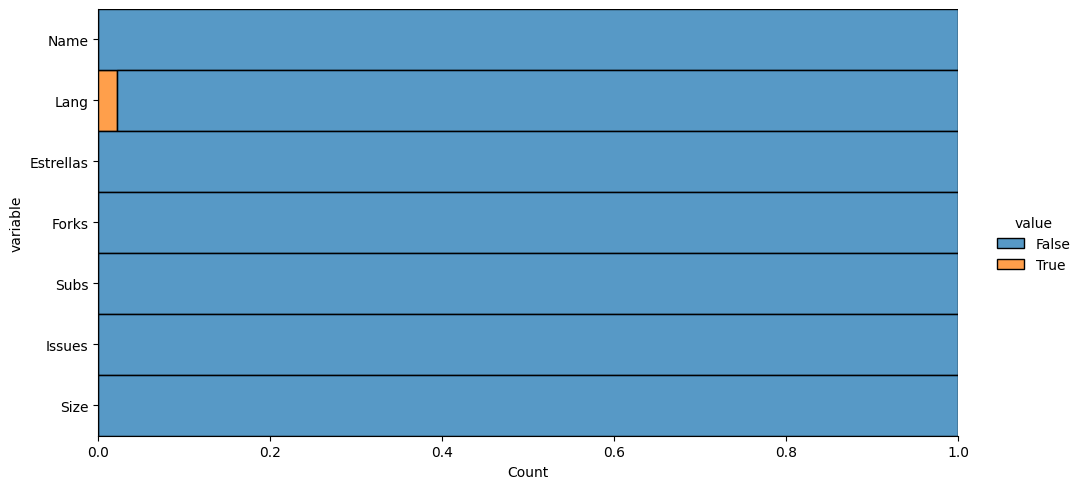

In [19]:
#Lo pasamos a un grafico
git_df.isnull().melt().pipe(
    lambda df: (
        sns.displot(
            data=df,y='variable',hue='value',multiple='fill',
            aspect=2
        )

    )

)

In [20]:
#¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?
git_df.isnull(). transpose()

,0,1,2,3,4,5,6,7,8,9,...,10719,10720,10721,10722,10723,10724,10725,10726,10727,10728
Name,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lang,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Estrellas,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Forks,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Subs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Issues,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Size,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

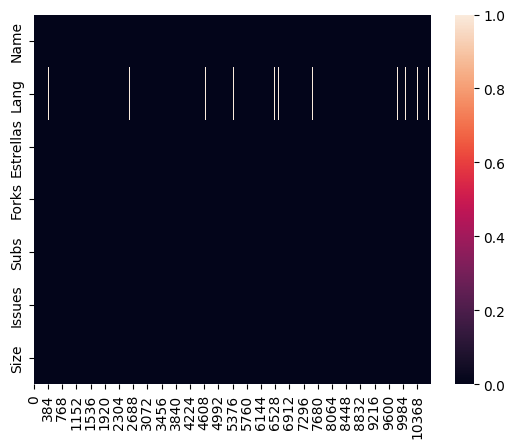

In [21]:
#Visualizamos con seaborm
git_df.isnull(). transpose().pipe(
    lambda df: (
        sns. heatmap(
        data=df

            )

        )

    )
#Se visualiza varias lienas blancas en la columna lang

In [22]:
#¿Cuántas observaciones perdemos si eliminamos los datos faltantes?
git_df_clean=git_df.dropna()
git_df_clean
#Con esto tenemos un dataset sin valores nulos

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,Ruby,1965,536,72,30,7954
1,rubinius,C,3044,604,103,15,168069
2,god,Ruby,2204,521,87,432,2639
3,restful-authentication,Ruby,1573,277,17,27,1208
4,attachment_fu,Ruby,1024,324,10,35,1008
...,...,...,...,...,...,...,...
10724,zed,JavaScript,2170,171,65,180,5777
10725,LINQKit,C#,1497,159,52,40,3695
10726,gt-nlp-class,TeX,4825,1055,323,2,331077
10727,realm-dotnet,C#,1189,164,75,137,81624


In [27]:
git_fil2 = git_df_clean[
    git_df_clean['Lang'].isin(
        git_df_clean['Lang'].value_counts()[git_df_clean['Lang'].value_counts() > 100].index
    ) & 
    (git_df_clean['Estrellas'] <= 10000
    ) & 
    (git_df_clean['Subs'] <= 1000
    ) & 
    (git_df_clean['Forks'] <= 2000)


]


In [28]:
git_df_clean.describe() #Este comando generará un resumen que incluye conteo, media, desviación estándar, mínimo, percentiles (25%, 50%, 75%) y máximo para cada columna numérica en tu DataFrame git_df

,Estrellas,Forks,Subs,Issues,Size
count,10494.000000,10494.000000,10494.000000,10494.000000,1.049400e+04
mean,2901.875834,675.513627,122.482085,100.505336,5.944172e+04
std,6458.076621,2404.367236,242.850721,339.649557,5.788385e+05
min,500.000000,0.000000,3.000000,0.000000,2.000000e+00
25%,718.000000,134.000000,37.000000,11.000000,6.430000e+02
50%,1192.500000,255.000000,64.000000,32.000000,2.911500e+03
75%,2539.500000,535.750000,121.000000,85.000000,1.783950e+04
max,165201.000000,136205.000000,8221.000000,16067.000000,3.247060e+07


In [29]:
#describe solo muestra las variables numerias
#Agregamos all para mostrar todas las varibales
git_df_clean.describe(include='all')

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
count,10494,10494,10494.000000,10494.000000,10494.000000,10494.000000,1.049400e+04
unique,10226,132,NaN,NaN,NaN,NaN,NaN
top,dotfiles,JavaScript,NaN,NaN,NaN,NaN,NaN
freq,22,2289,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2901.875834,675.513627,122.482085,100.505336,5.944172e+04
std,NaN,NaN,6458.076621,2404.367236,242.850721,339.649557,5.788385e+05
min,NaN,NaN,500.000000,0.000000,3.000000,0.000000,2.000000e+00
25%,NaN,NaN,718.000000,134.000000,37.000000,11.000000,6.430000e+02
50%,NaN,NaN,1192.500000,255.000000,64.000000,32.000000,2.911500e+03
75%,NaN,NaN,2539.500000,535.750000,121.000000,85.000000,1.783950e+04


In [30]:
#Solo las numéricas
git_fil2.describe(include=[np.number])

,Estrellas,Forks,Subs,Issues,Size
count,8716.000000,8716.000000,8716.000000,8716.000000,8.716000e+03
mean,1776.389858,362.769160,83.753098,71.049105,4.766784e+04
std,1694.018772,351.274287,74.540067,144.074810,5.488615e+05
min,500.000000,0.000000,3.000000,0.000000,5.000000e+00
25%,698.000000,132.000000,36.000000,11.000000,5.650000e+02
50%,1097.500000,240.000000,60.000000,29.000000,2.355000e+03
75%,2111.250000,457.000000,105.000000,73.000000,1.408700e+04
max,9995.000000,2000.000000,900.000000,2883.000000,3.247060e+07


In [31]:
#Solo categóricas - 1
git_df_clean.describe(include=object)

,Name,Lang
count,10494,10494
unique,10226,132
top,dotfiles,JavaScript
freq,22,2289


In [32]:
#¿Cómo visualizar los conteos?
git_df_clean.Lang.value_counts()

Lang
JavaScript    2289
Python        1292
Ruby          1061
Java           867
C              718
              ... 
Mako             1
Oz               1
DM               1
LLVM             1
Awk              1
Name: count, Length: 132, dtype: int64

In [33]:
git_fil = git_df_clean[git_df_clean['Lang'].isin(git_df_clean['Lang'].value_counts()[git_df_clean['Lang'].value_counts() > 100].index)]

In [34]:
git_fil2 = git_df_clean[
    git_df_clean['Lang'].isin(
        git_df_clean['Lang'].value_counts()[git_df_clean['Lang'].value_counts() > 100].index
    ) & 
    (git_df_clean['Estrellas'] <= 8000
    ) & 
    (git_df_clean['Subs'] <= 1000
    ) & 
    (git_df_clean['Forks'] <= 2000)


]


In [35]:
git_fil2

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,Ruby,1965,536,72,30,7954
1,rubinius,C,3044,604,103,15,168069
2,god,Ruby,2204,521,87,432,2639
3,restful-authentication,Ruby,1573,277,17,27,1208
4,attachment_fu,Ruby,1024,324,10,35,1008
...,...,...,...,...,...,...,...
10723,heroku-fucking-console,Ruby,560,17,12,4,6
10724,zed,JavaScript,2170,171,65,180,5777
10725,LINQKit,C#,1497,159,52,40,3695
10727,realm-dotnet,C#,1189,164,75,137,81624


In [36]:
git_fil2.shape

(8586, 7)

In [37]:
git_fil.value_counts('Lang')

Lang
JavaScript     2289
Python         1292
Ruby           1061
Java            867
C               718
PHP             666
C++             585
Objective-C     538
HTML            297
C#              282
Shell           229
Go              202
CSS             172
TypeScript      128
Scala           103
Name: count, dtype: int64

In [38]:
#Valores Unicos de lenguaje
git_fil2.value_counts('Lang').nunique()

15

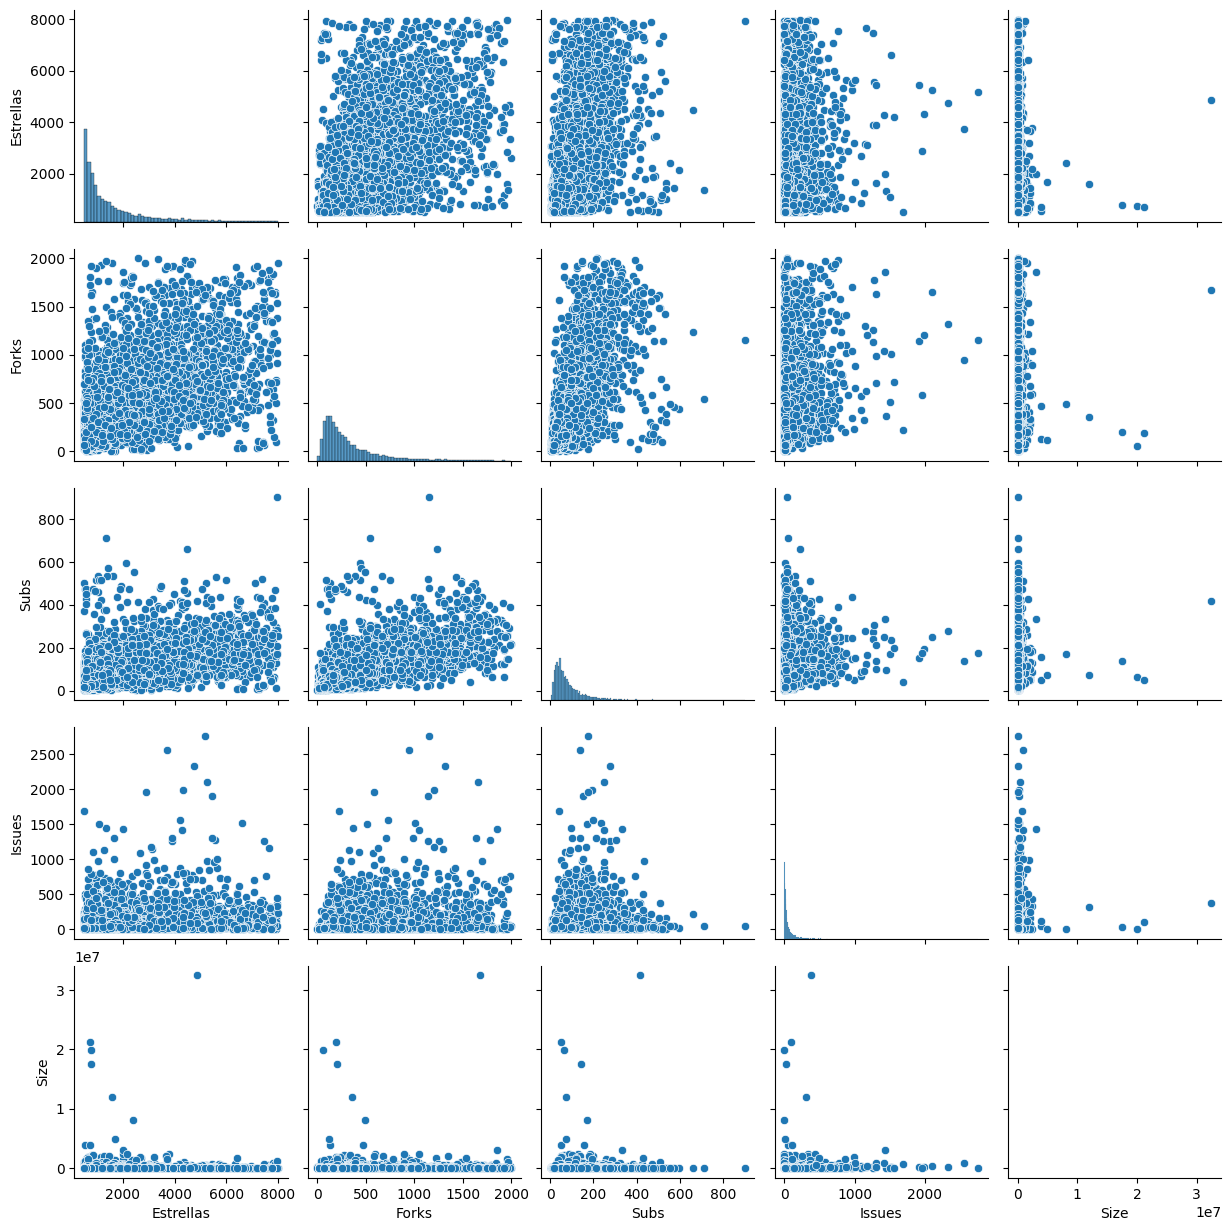

In [39]:
sns.pairplot(git_fil2)

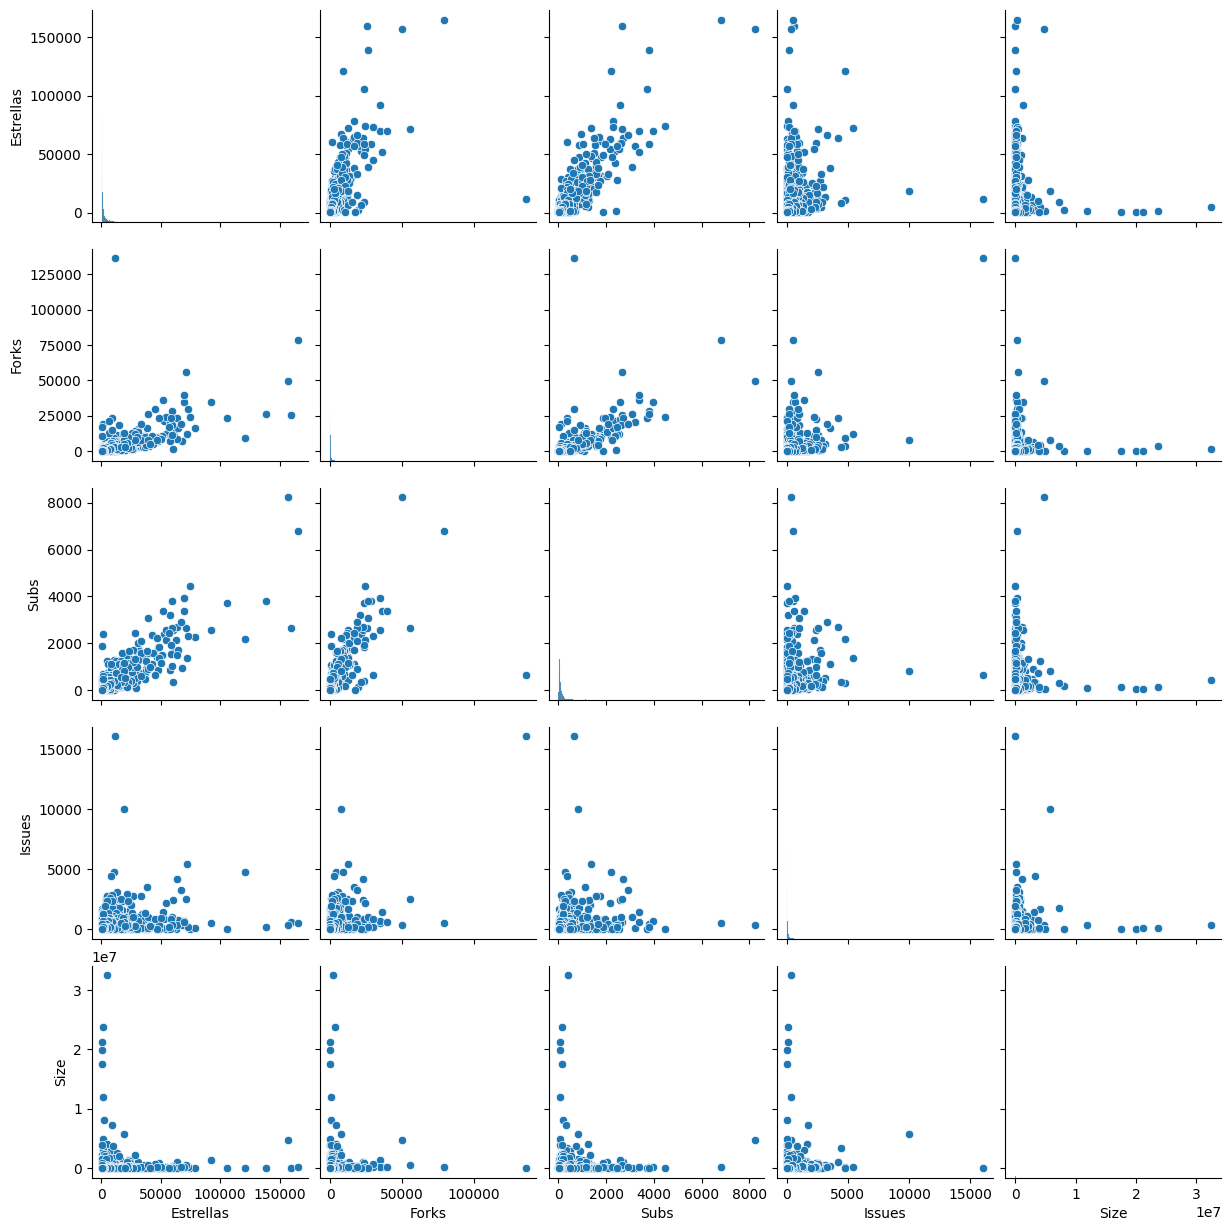

In [40]:
sns.pairplot(git_fil)

<Axes: xlabel='Lang'>

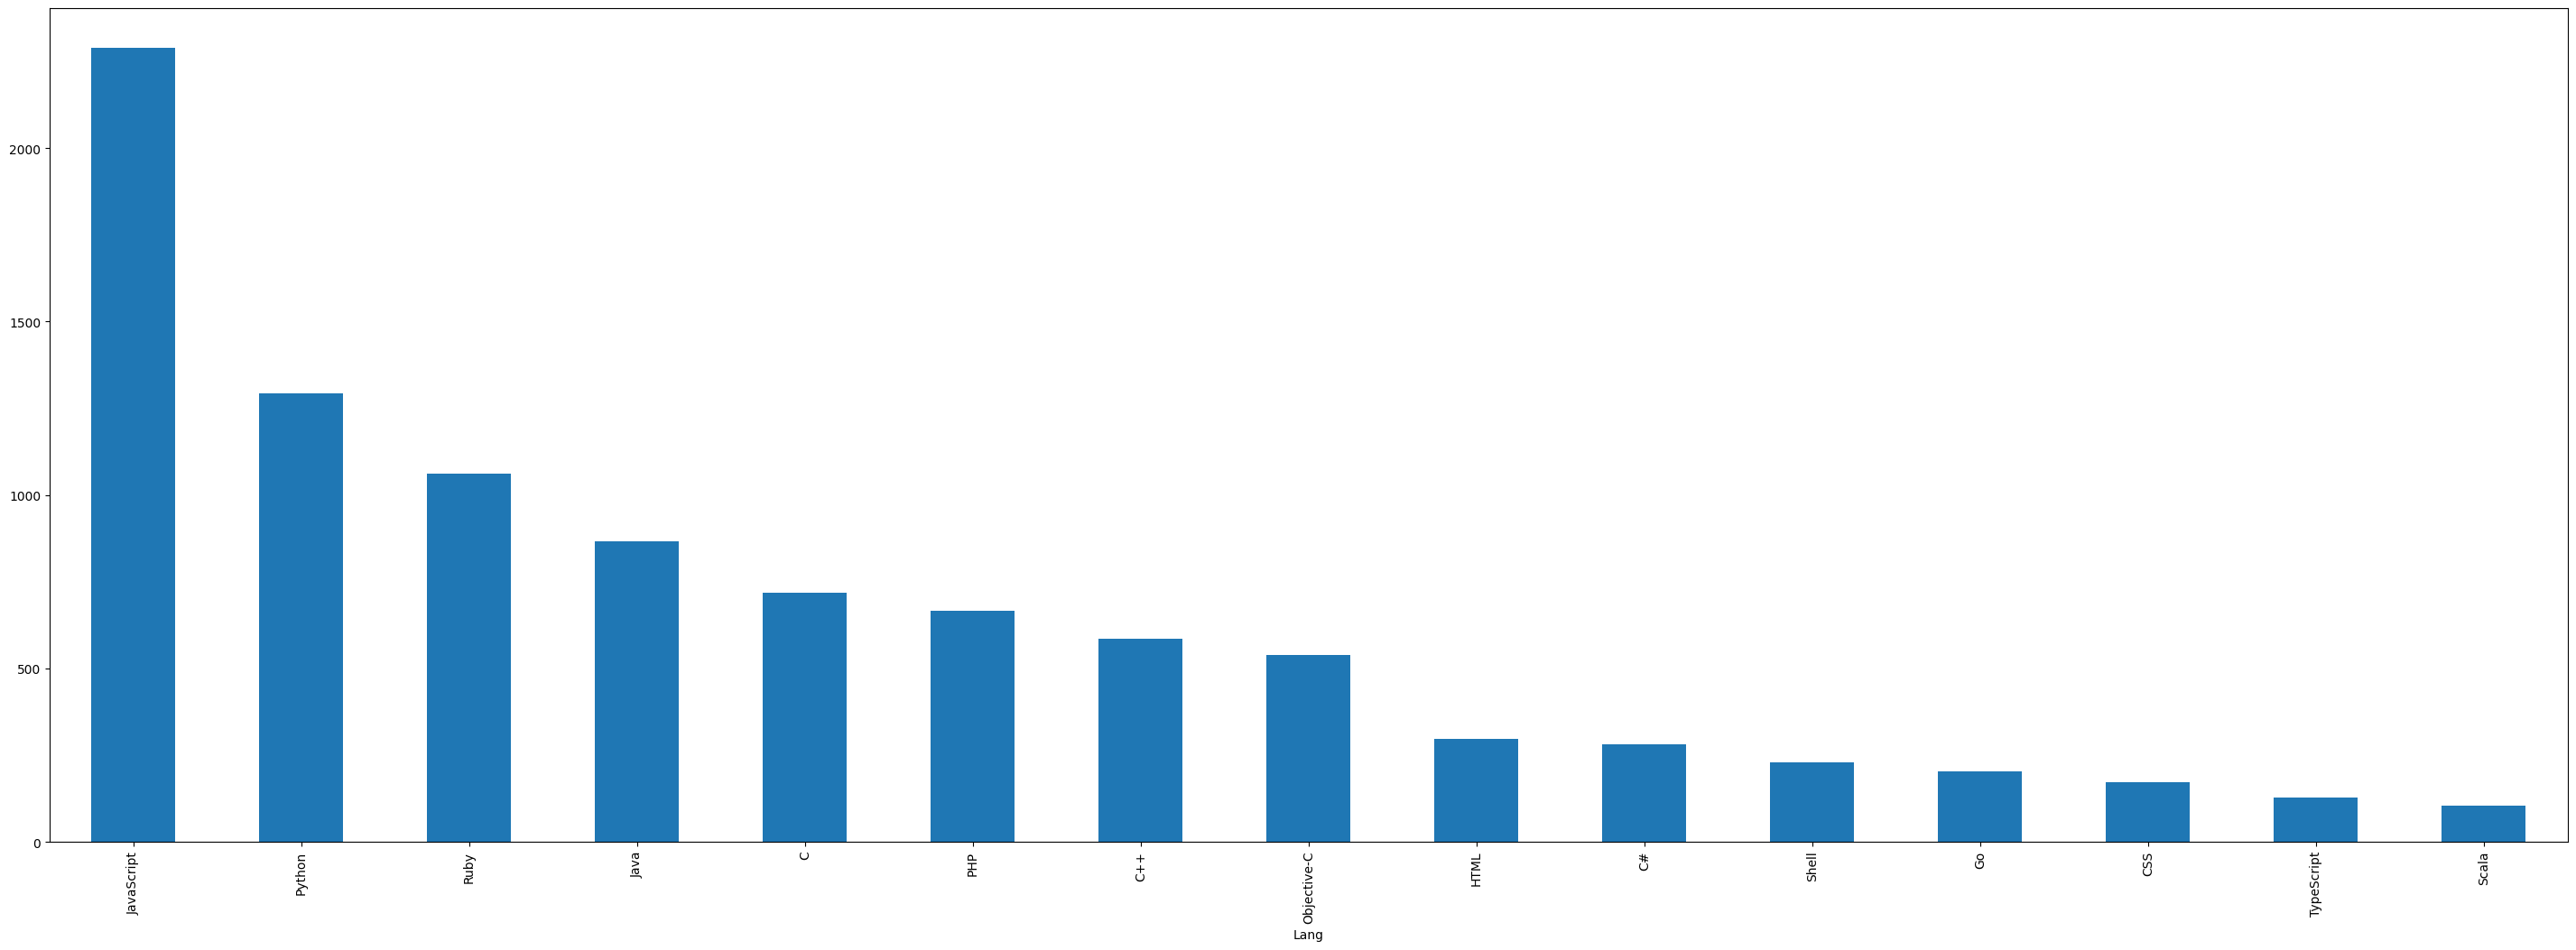

In [41]:
#Para graficar Pandas
git_fil.Lang. value_counts().plot(
    figsize=(36,12),
    kind='bar'

)

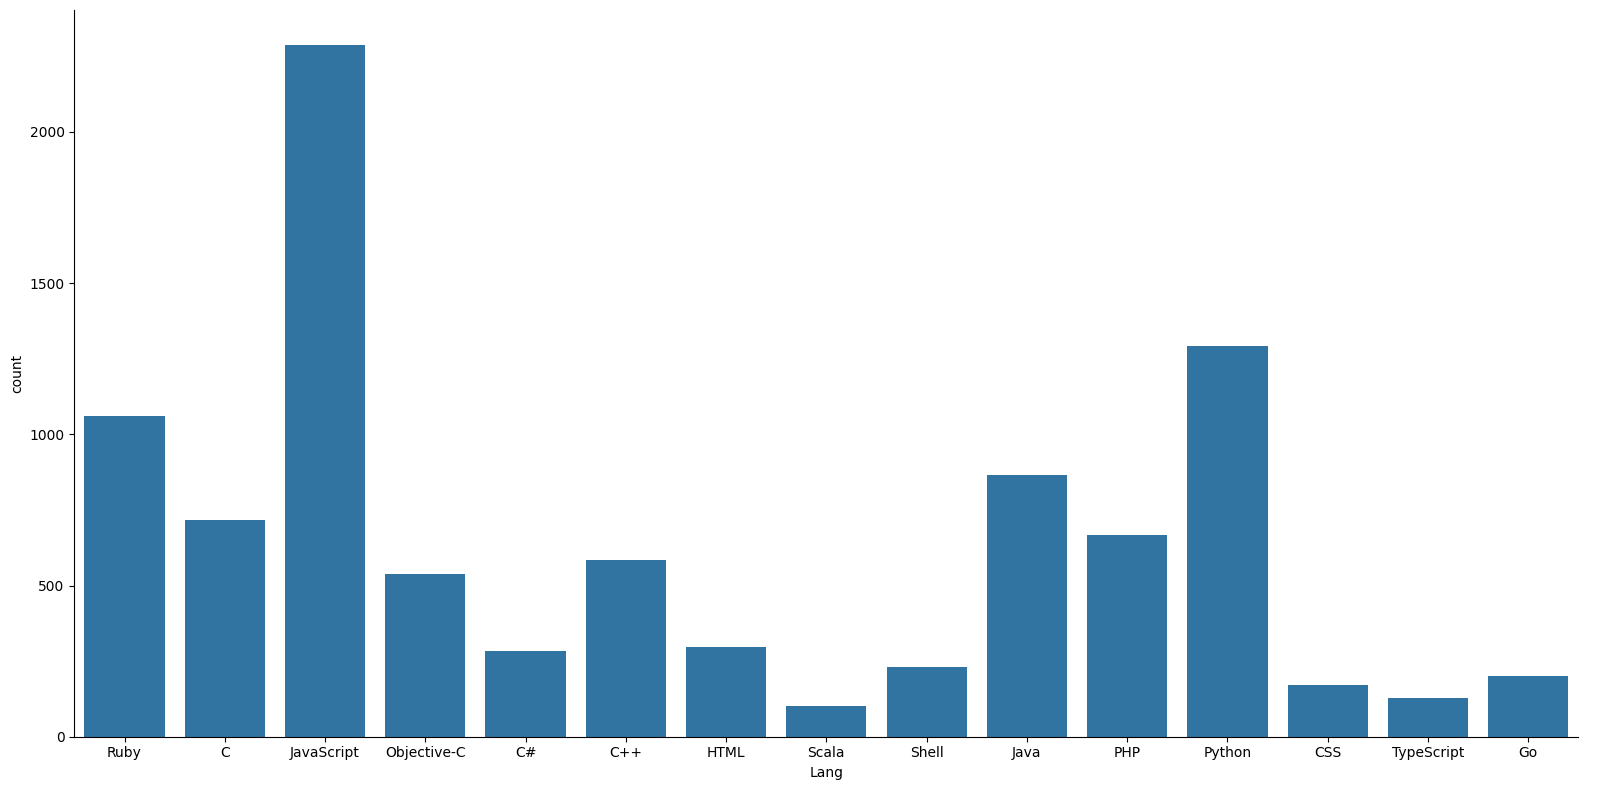

In [42]:
#Con Seaborn
sns.catplot(
data=git_fil,
    x='Lang',
    kind='count',
    height=8, aspect=2
)

C:\Users\guido\AppData\Local\Temp\ipykernel_6484\297664486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


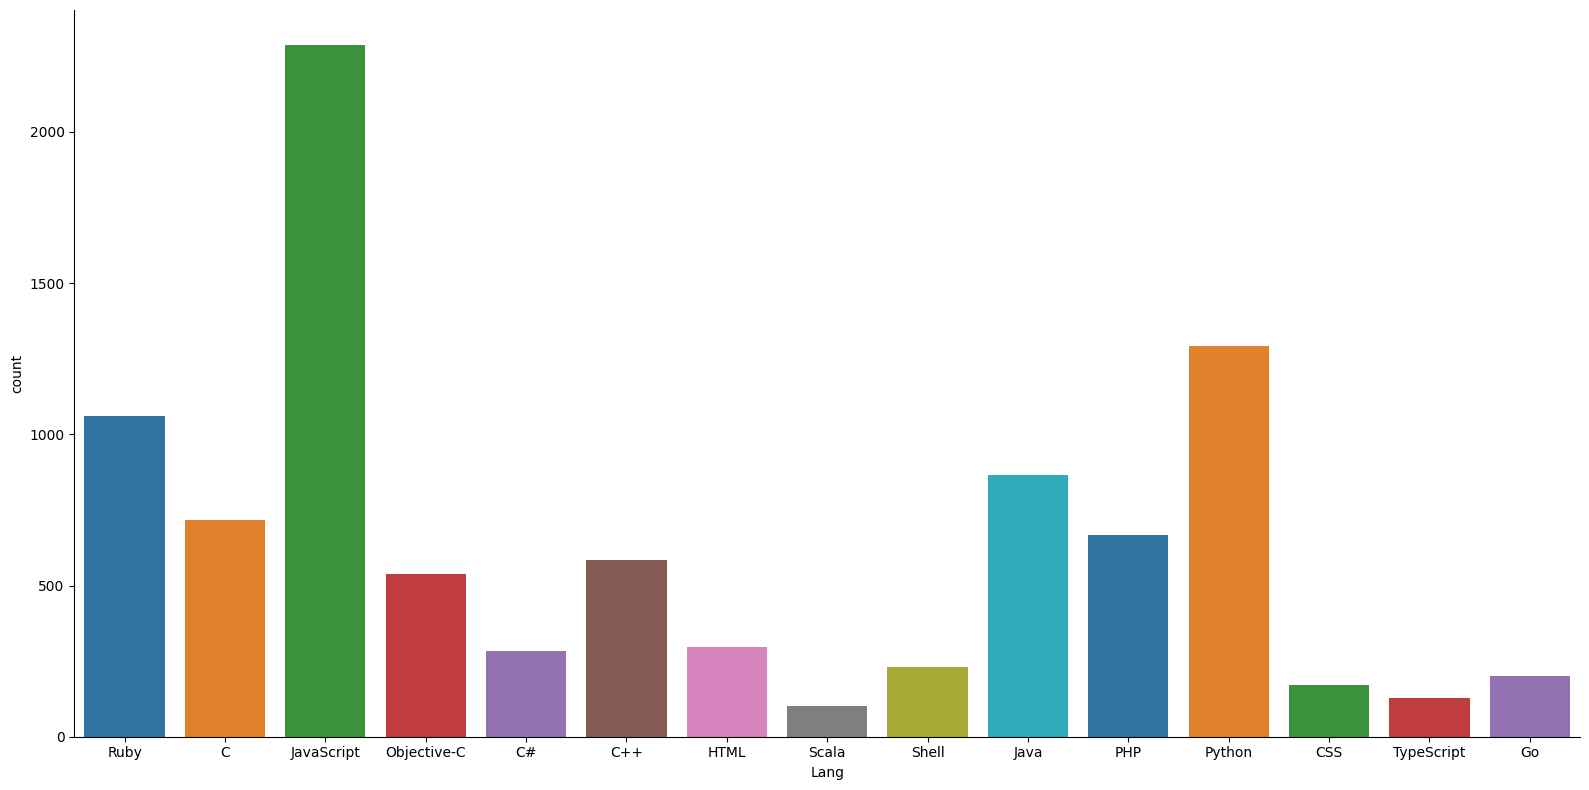

In [43]:
#para asignar colores
#Con Seaborn realiza el conteo en forma automatica
sns.catplot(
    data=git_fil,
    x='Lang',
    kind='count',
    height=8, aspect=2,
    palette='tab10'
)

([<matplotlib.patches.Wedge at 0x18a5a76d5e0>,
 [Text(0.7953022778362111, 0.7599304487047049, 'JavaScript'),
  Text(-0.4131090980405665, 1.019480687956427, 'Python'),
  Text(-1.0123857845918003, 0.4302034671599533, 'Ruby'),
  Text(-1.0683254800654491, -0.26206996898333834, 'Java'),
  Text(-0.7907304829767715, -0.7646864084651445, 'C'),
  Text(-0.3678871112668631, -1.0366576452058427, 'PHP'),
  Text(0.0832994333403225, -1.0968414673074598, 'C++'),
  Text(0.4784274646102111, -0.9905085366147257, 'Objective-C'),
  Text(0.7320584209370092, -0.821030126326198, 'HTML'),
  Text(0.8758858728137549, -0.6654501768016048, 'C#'),
  Text(0.975972669488333, -0.5074222584907144, 'Shell'),
  Text(1.0385437177493066, -0.3625285455291058, 'Go'),
  Text(1.0755491316580303, -0.23063838663513303, 'CSS'),
  Text(1.0931958153542882, -0.12215936023028723, 'TypeScript'),
  Text(1.0993523151453324, -0.03774237915921742, 'Scala')],
 [Text(0.4338012424561151, 0.4145075174752936, '24.3%'),
  Text(-0.22533223529485

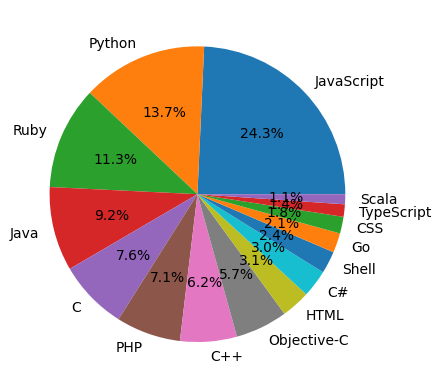

In [44]:
#Grafico circular
# Utilizar la paleta 'tab10' de Seaborn para generar una lista de colores
colors = sns.color_palette('tab10')

plt.pie(git_fil.Lang. value_counts(),
labels=git_fil.Lang.value_counts().index,
autopct='%1.1f%%', colors=colors)

<Axes: >

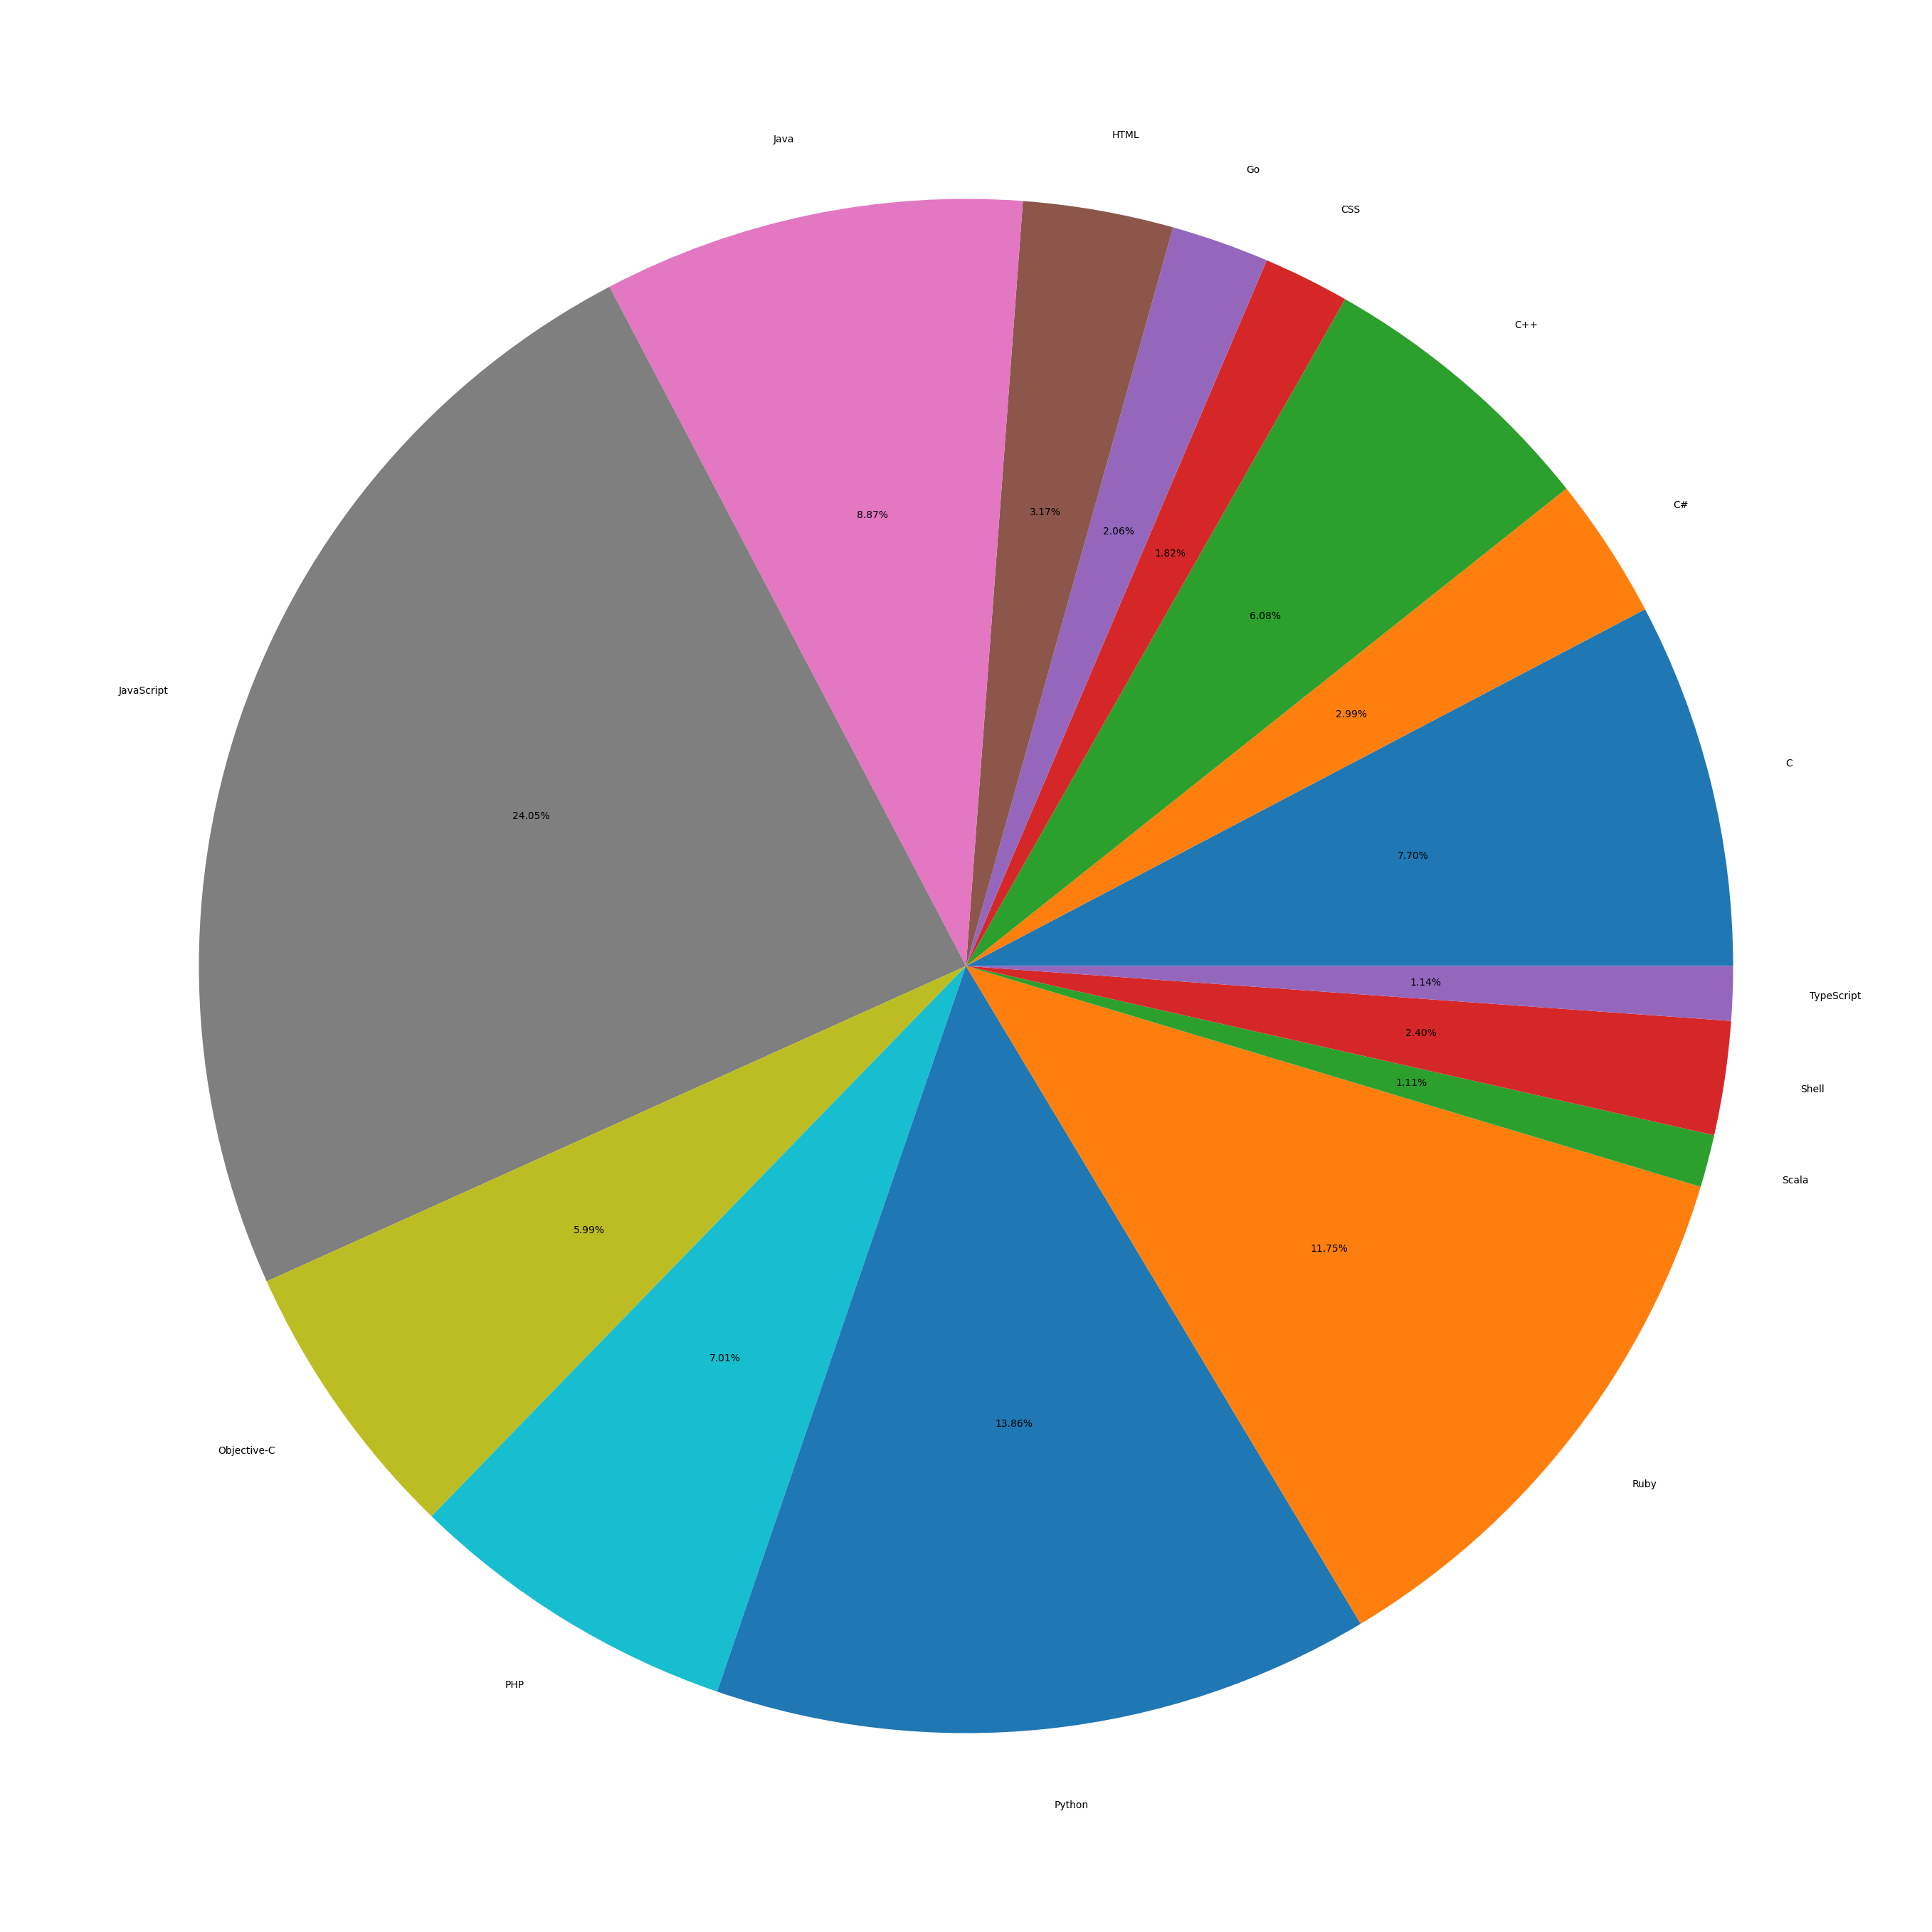

In [45]:
git_fil2.groupby('Lang').size().plot(kind='pie', autopct='%1.2f%%', figsize=(35,35)
,colors=colors)

## Como visualizar las proporciones

D:\Proyectos\ML\mlproyect\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)


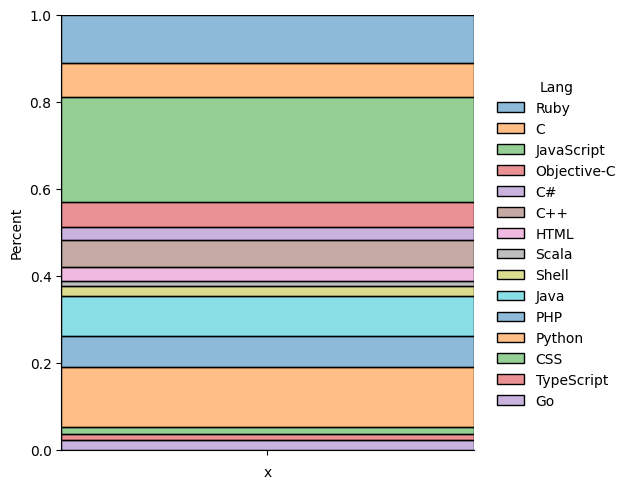

In [46]:
(  
    git_fil
    .add_column('x','')
    .pipe(
        lambda git_fil: (
            sns.displot(
                data=git_fil,
                x='x',
                hue='Lang',
                multiple='fill',
                palette='tab10',
                stat='percent',
                alpha=0.5
            )
        )
    )
)

# Medidas de tendencia central

In [47]:
#media con pandas
git_fil.Estrellas. mean()

2948.0381800827236

In [48]:
git_fil.mean(numeric_only=True) #Solo variables numericas

Estrellas     2948.038180
Forks          696.377453
Subs           124.739209
Issues          99.051119
Size         60538.258564
dtype: float64

In [49]:
#media con numpay
np.mean(git_fil.Estrellas)

2948.0381800827236

In [50]:
git_df_clean.median(numeric_only=True)

Estrellas    1192.5
Forks         255.0
Subs           64.0
Issues         32.0
Size         2911.5
dtype: float64

In [51]:
git_df_clean.mode()

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
0,dotfiles,JavaScript,504.0,69.0,47.0,0.0,81
1,NaN,NaN,543.0,114.0,NaN,NaN,130
2,NaN,NaN,NaN,NaN,NaN,NaN,164
3,NaN,NaN,NaN,NaN,NaN,NaN,313


In [52]:
git_df_clean.mode(numeric_only=True)

,Estrellas,Forks,Subs,Issues,Size
0,504.0,69.0,47.0,0.0,81
1,543.0,114.0,NaN,NaN,130
2,NaN,NaN,NaN,NaN,164
3,NaN,NaN,NaN,NaN,313


In [53]:
git_df_clean.describe(include=object)

,Name,Lang
count,10494,10494
unique,10226,132
top,dotfiles,JavaScript
freq,22,2289


In [54]:
#¿Qué tipo de dato son las variables del conjunto de datos?
git_df_clean.dtypes

Name         object
Lang         object
Estrellas     int64
Forks         int64
Subs          int64
Issues        int64
Size          int64
dtype: object

In [55]:
#Cuantas variables de cada tipo
git_df_clean.dtypes.value_counts()

int64     5
object    2
Name: count, dtype: int64

In [56]:
#¿Cuántas variables y observaciones tenemos en el conjunto de datos?
git_df_clean.shape

(10494, 7)

# Obtención de medidas de dispersión

In [57]:
#¿Cuál es el valor máximo de las variables?
git_df_clean.max(numeric_only=True)
#Pasamos numeric_only porque solo nos interesa los numeros

Estrellas      165201
Forks          136205
Subs             8221
Issues          16067
Size         32470596
dtype: int64

In [58]:
#¿Cuál es el valor mínimo de las variables?
git_df_clean.min(numeric_only=True)

Estrellas    500
Forks          0
Subs           3
Issues         0
Size           2
dtype: int64

In [59]:
#¿Cuál es el rango de las variables?
git_df_clean.max(numeric_only=True)-git_df_clean.min(numeric_only=True)

Estrellas      164701
Forks          136205
Subs             8218
Issues          16067
Size         32470594
dtype: int64

In [60]:
#¿Cual es la desviacion estandar de Las variables?
git_df_clean.std(numeric_only=True)

Estrellas      6458.076621
Forks          2404.367236
Subs            242.850721
Issues          339.649557
Size         578838.463068
dtype: float64

In [61]:
#¿Cual es el rango intercuartilico?
git_df_clean.quantile(0.25, numeric_only=True)

Estrellas    718.0
Forks        134.0
Subs          37.0
Issues        11.0
Size         643.0
Name: 0.25, dtype: float64

In [62]:
#Rango intercuatilico
(git_df_clean.quantile(0.75, numeric_only=True)
-git_df_clean.quantile(0.25, numeric_only=True))

Estrellas     1821.50
Forks          401.75
Subs            84.00
Issues          74.00
Size         17196.50
dtype: float64

In [63]:
#Para verlo en forma mas visual
(
git_df_clean.quantile(q=[0.75,0.50,0.25], numeric_only=True)
. transpose()
. rename_axis('variable')
.reset_index().assign(
iqr=lambda df: df[0.75]-df[0.25]
)
)

,variable,0.75,0.5,0.25,iqr
0,Estrellas,2539.50,1192.5,718.0,1821.50
1,Forks,535.75,255.0,134.0,401.75
2,Subs,121.00,64.0,37.0,84.00
3,Issues,85.00,32.0,11.0,74.00
4,Size,17839.50,2911.5,643.0,17196.50


In [64]:
git_df_clean.head()

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,Ruby,1965,536,72,30,7954
1,rubinius,C,3044,604,103,15,168069
2,god,Ruby,2204,521,87,432,2639
3,restful-authentication,Ruby,1573,277,17,27,1208
4,attachment_fu,Ruby,1024,324,10,35,1008


<Axes: xlabel='Lang', ylabel='Count'>

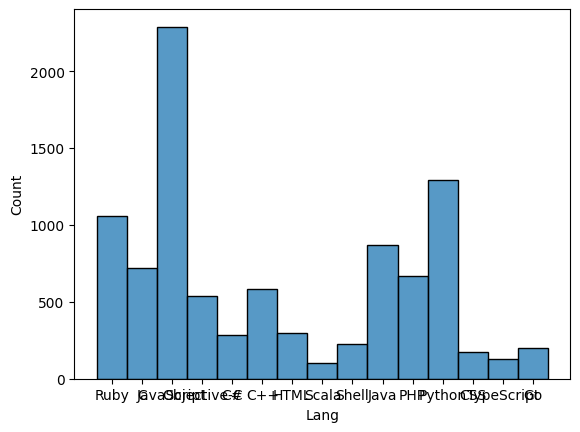

In [65]:
#Histograma
sns.histplot(
    data=git_fil,
    x='Lang'
)
#En el grafico el ancho de clase es de 5

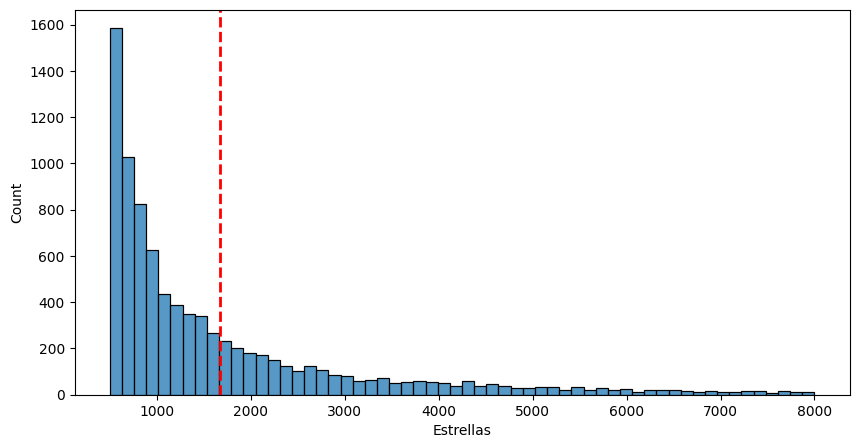

In [66]:
#Histograma
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

sns.histplot(data=git_fil2, 
             x='Estrellas')

plt.axvline(
x=git_fil2.Estrellas.mean(),
color='red',
linestyle='dashed',
linewidth=2,
)
#Agregar Los demas estatisticos

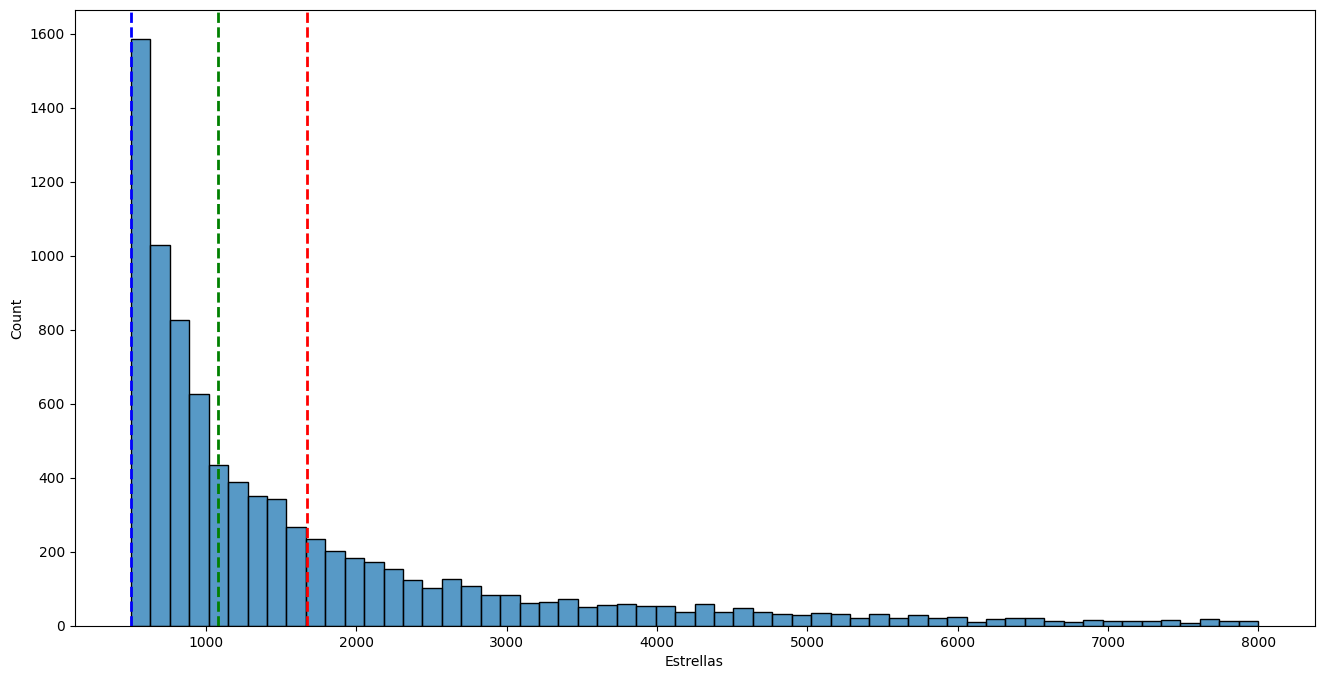

In [67]:
#Histograma
# Ajustar el tamaño de la figura
plt.figure(figsize=(16, 8))

sns.histplot(
data=git_fil2,
x='Estrellas'
)
plt.axvline(
    x=git_fil2.Estrellas.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=git_fil2.Estrellas.median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=git_fil2.Estrellas.mode()[0],
    color='blue',
    linestyle='dashed',
    linewidth=2
)
#Agregar Los demas estatisticos


In [68]:
#Calcular la asimetria
git_fil.Estrellas.skew()

10.314295339563083

In [69]:
#Calcular la asimetria de las variables numericas
git_fil.skew(numeric_only=True)

Estrellas    10.314295
Forks        25.526650
Subs         11.537423
Issues       22.107252
Size         35.770426
dtype: float64

## Diagrama de caja / boxplot

<Axes: xlabel='Estrellas', ylabel='Lang'>

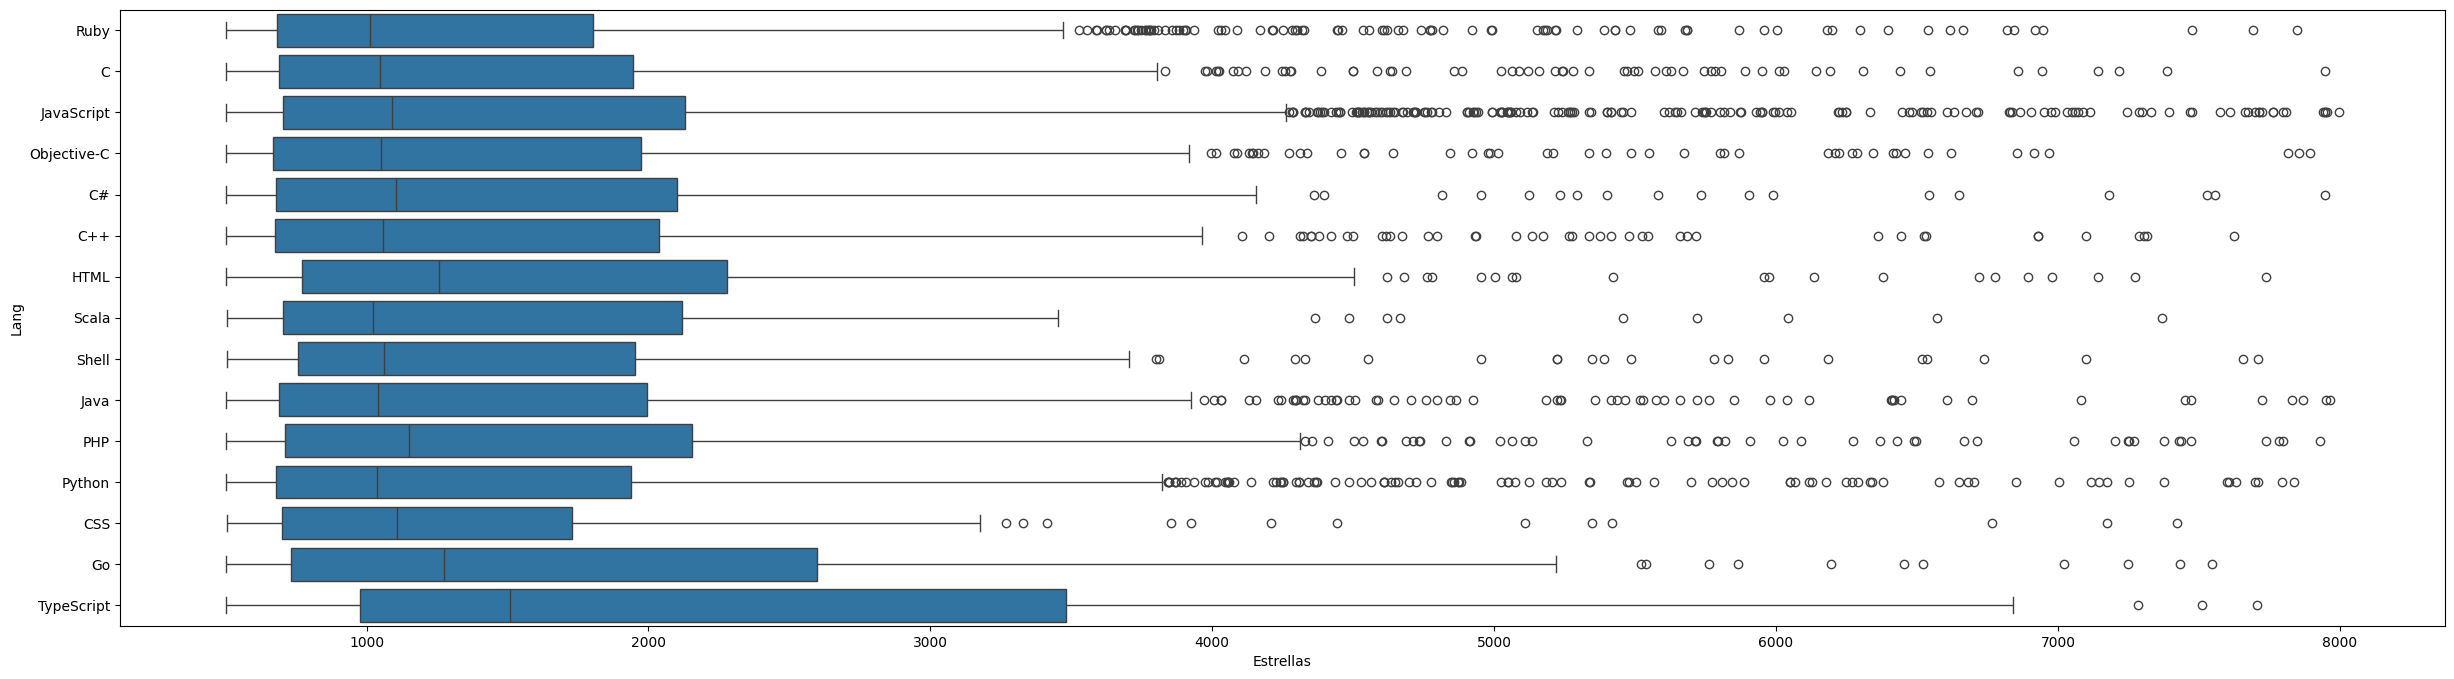

In [70]:
plt.figure(figsize=(30,8))
sns.boxplot (
    data=git_fil2,
    x='Estrellas',
    y='Lang'
)

# Análisis bivariado


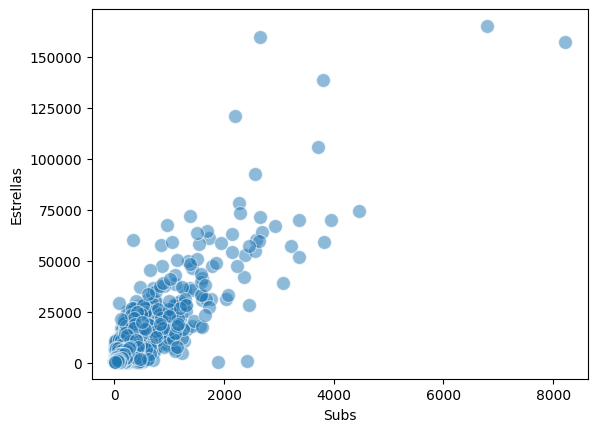

In [71]:
sns.scatterplot(
    data=git_fil,
    x='Subs',
    y='Estrellas',
    alpha=1/2,
    s=100
);

In [72]:
git_fil2 = git_df_clean[
    git_df_clean['Lang'].isin(
        git_df_clean['Lang'].value_counts()[git_df_clean['Lang'].value_counts() > 100].index
    ) & 
    (git_df_clean['Estrellas'] <= 10000
    ) & 
    (git_df_clean['Subs'] <= 1000
    ) & 
    (git_df_clean['Forks'] <= 5000
    ) & 
    (git_df_clean['Issues'] <= 1600)


]


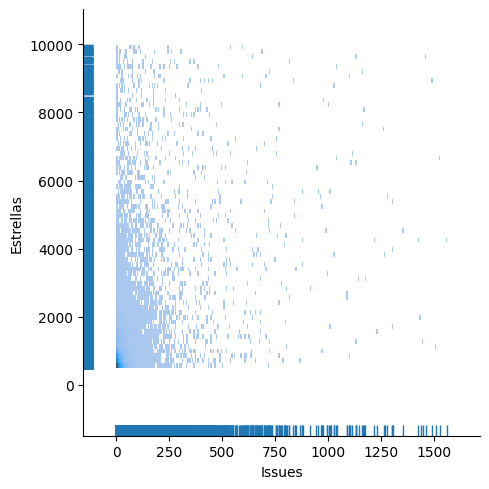

In [73]:
sns.displot(
    data=git_fil2,
    x='Issues',
    y='Estrellas',
    rug=True, # Analizar cada wea como asdaslkd
);

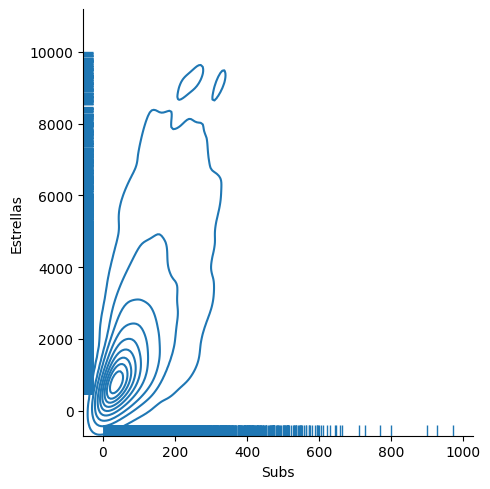

In [74]:
sns.displot(
    data=git_fil2,
    x='Subs',
    y='Estrellas',
    rug=True, # Analizar cada wea como asdaslkd
    kind='kde'
);

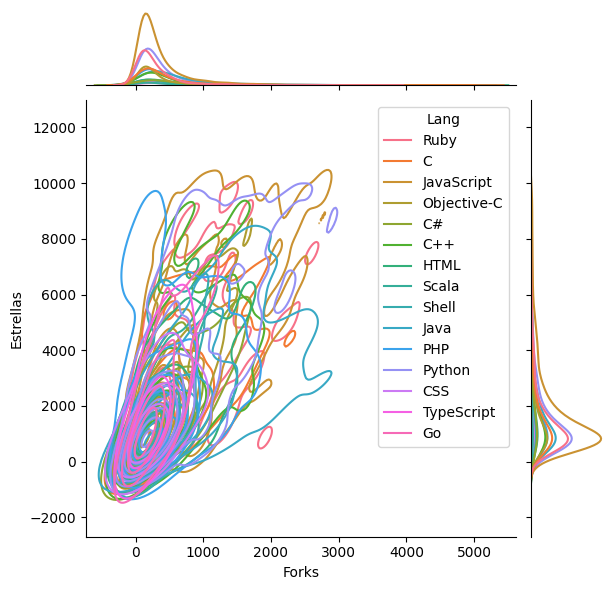

In [75]:
sns.jointplot(
    data=git_fil2,
    x='Forks',
    y='Estrellas',
    kind='kde',
    hue='Lang'
);

C:\Users\guido\AppData\Local\Temp\ipykernel_6484\1142057696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


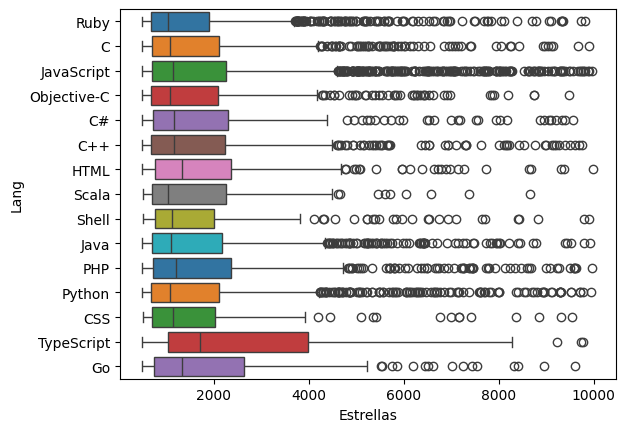

In [76]:
# Guardamos el boxplot en una variable
ax = sns.boxplot(
    data=git_fil2,
    x='Estrellas',
    y='Lang',
    palette='tab10',
);


C:\Users\guido\AppData\Local\Temp\ipykernel_6484\2822339929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


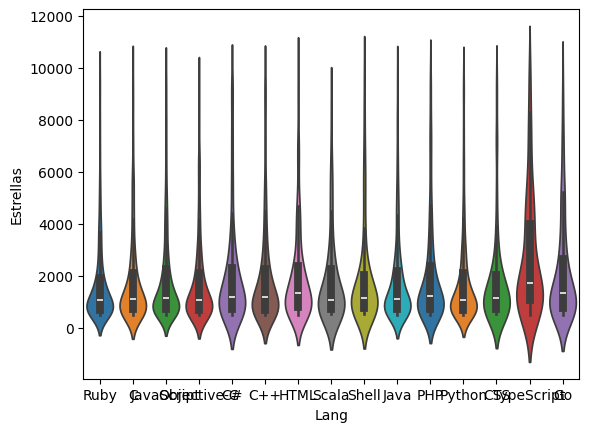

In [77]:
ax = sns.violinplot(
    data=git_fil2,
    x='Lang',
    y='Estrellas',
    palette='tab10',
);


C:\Users\guido\AppData\Local\Temp\ipykernel_6484\4187948557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


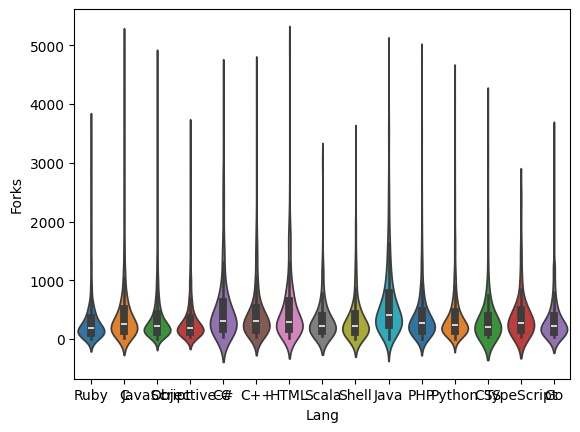

In [84]:
ax = sns.violinplot(
    data=git_fil2,
    x='Lang',
    y='Forks',
    palette='tab10',
);


<Axes: xlabel='Lang', ylabel='Estrellas'>

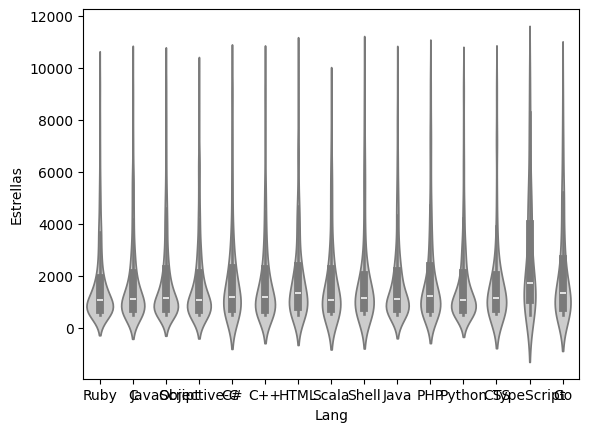

In [85]:
sns.violinplot(
    data=git_fil2,
    x='Lang',
    y='Estrellas',
    color='.8'
)

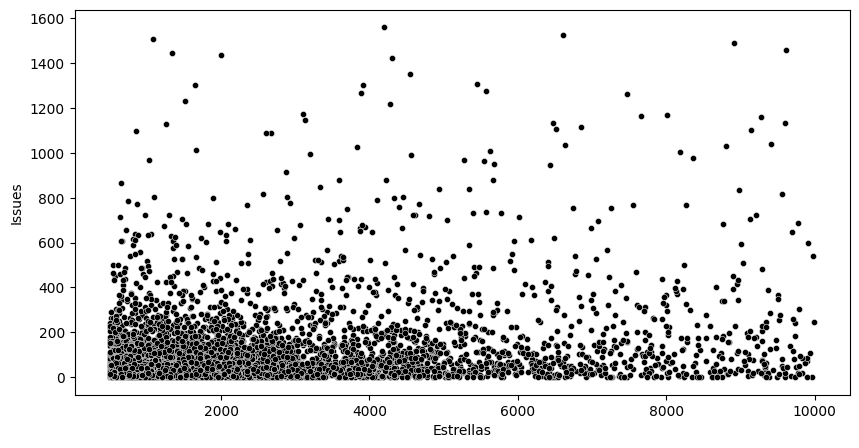

In [88]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=git_fil2,
    x='Estrellas',
    y='Issues',
    color='.0',
    s=20
);

In [89]:
git_fil2.shape #Numero de filas y columnas

(8902, 7)

In [90]:
git_fil2.corr(numeric_only=True)

,Estrellas,Forks,Subs,Issues,Size
Estrellas,1.000000,0.655976,0.659835,0.324159,0.022118
Forks,0.655976,1.000000,0.741342,0.362408,0.084556
Subs,0.659835,0.741342,1.000000,0.305082,0.069880
Issues,0.324159,0.362408,0.305082,1.000000,0.074863
Size,0.022118,0.084556,0.069880,0.074863,1.000000


<Axes: >

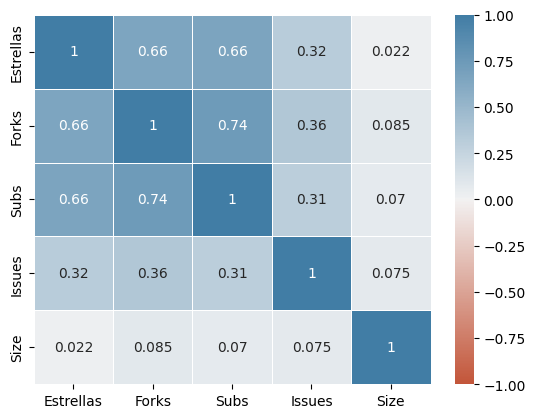

In [91]:
sns.heatmap(
    data=git_fil2.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=.5,
    annot=True,
)

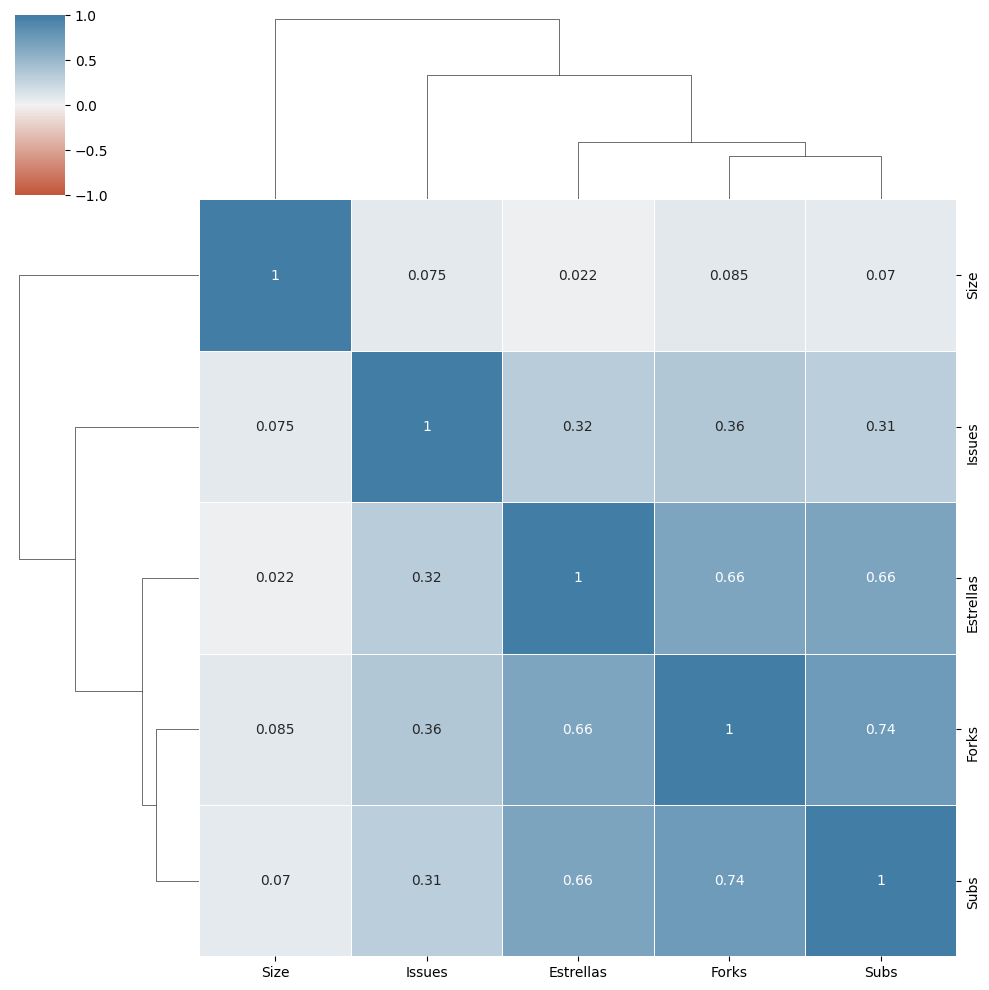

In [92]:
sns.clustermap(
    data=git_fil2.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=.5,
    annot=True,
)

# Limitantes de los coeficientes de correlación lineal


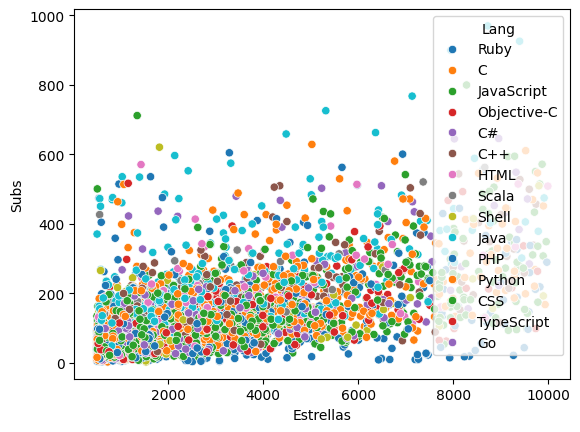

Lang
C              0.777725
C#             0.774761
C++            0.769079
CSS            0.638336
Go             0.726780
HTML           0.688367
Java           0.709568
JavaScript     0.745111
Objective-C    0.768639
PHP            0.466945
Python         0.692761
Ruby           0.540266
Scala          0.750255
Shell          0.573937
TypeScript     0.721606
Name: Estrellas, dtype: float64

In [99]:
sns.scatterplot(
    data=git_fil2,
    x='Estrellas',
    y='Subs',
    hue='Lang',
    palette='tab10'
)
plt.show()
git_fil2.groupby('Lang').Estrellas.corr(git_fil2.Subs)

### Paradoja de Simpson


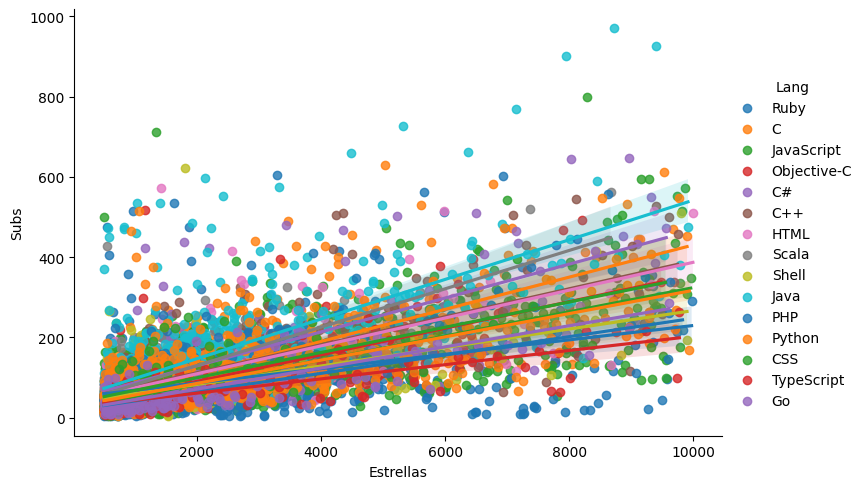

In [100]:
sns.lmplot(
    data=git_fil2,
    x='Estrellas',
    y='Subs',
    hue='Lang',
    palette='tab10',
    aspect=1.5
)

# Normalización / MinMaxScaler


In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

In [50]:
git_df_clean

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,https://github.com/mojombo/grit,Ruby,1965,536,72,30,7954
1,rubinius,https://github.com/rubinius/rubinius,C,3044,604,103,15,168069
2,god,https://github.com/mojombo/god,Ruby,2204,521,87,432,2639
3,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,1573,277,17,27,1208
4,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,1024,324,10,35,1008
...,...,...,...,...,...,...,...,...
10724,zed,https://github.com/zedapp/zed,JavaScript,2170,171,65,180,5777
10725,LINQKit,https://github.com/scottksmith95/LINQKit,C#,1497,159,52,40,3695
10726,gt-nlp-class,https://github.com/jacobeisenstein/gt-nlp-class,TeX,4825,1055,323,2,331077
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,1189,164,75,137,81624


In [51]:
    git_df_clean.tail(2)

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,1189,164,75,137,81624
10728,xbanish,https://github.com/jcs/xbanish,C,502,63,16,16,40


In [190]:
git_df_clean.describe()

,Estrellas,Forks,Subs,Issues,Size
count,10494.000000,10494.000000,10494.000000,10494.000000,1.049400e+04
mean,2901.875834,675.513627,122.482085,100.505336,5.944172e+04
std,6458.076621,2404.367236,242.850721,339.649557,5.788385e+05
min,500.000000,0.000000,3.000000,0.000000,2.000000e+00
25%,718.000000,134.000000,37.000000,11.000000,6.430000e+02
50%,1192.500000,255.000000,64.000000,32.000000,2.911500e+03
75%,2539.500000,535.750000,121.000000,85.000000,1.783950e+04
max,165201.000000,136205.000000,8221.000000,16067.000000,3.247060e+07


In [191]:
# Creo el objeto escalador
escalador_minmax = MinMaxScaler()

# Creo un nuevo dataframe solo porque debo aplicar otros métodos
df_minmax = git_df_clean

# Aplico la función fit_transform() sobre las variables que quiero modificar y las reemplazo en el dataframe original
df_minmax[["Estrellas", "Forks", "Subs", "Issues", "Size"]] = escalador_minmax.fit_transform(df_minmax[["Estrellas", "Forks", "Subs", "Issues", "Size"]])

# Imprimo las primeras filas del dataframe original para ver cómo queda
df_minmax.head()

C:\Users\guido\AppData\Local\Temp\ipykernel_31580\126967293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minmax[["Estrellas", "Forks", "Subs", "Issues", "Size"]] = escalador_minmax.fit_transform(df_minmax[["Estrellas", "Forks", "Subs", "Issues", "Size"]])


,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,https://github.com/mojombo/grit,Ruby,0.008895,0.003935,0.008396,0.001867,0.000245
1,rubinius,https://github.com/rubinius/rubinius,C,0.015446,0.004434,0.012168,0.000934,0.005176
2,god,https://github.com/mojombo/god,Ruby,0.010346,0.003825,0.010221,0.026887,0.000081
3,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,0.006515,0.002034,0.001704,0.001680,0.000037
4,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,0.003182,0.002379,0.000852,0.002178,0.000031


In [211]:
df_minmax.tail(5)

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje
10724,zed,https://github.com/zedapp/zed,JavaScript,-0.113333,-0.209842,-0.236708,0.234060,-0.092715,52
10725,LINQKit,https://github.com/scottksmith95/LINQKit,C#,-0.217548,-0.214833,-0.290242,-0.178149,-0.096312,13
10726,gt-nlp-class,https://github.com/jacobeisenstein/gt-nlp-class,TeX,0.297800,0.157840,0.825723,-0.290034,0.469299,114
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,-0.265243,-0.212754,-0.195529,0.107453,0.038324,13
10728,xbanish,https://github.com/jcs/xbanish,C,-0.371626,-0.254763,-0.438488,-0.248813,-0.102627,12


# Estandarización / StandarScaler



In [194]:
# Creo el objeto escalador
escalador_std = StandardScaler()

# Creo un nuevo dataframe solo porque debo aplicar otros métodos
df_std = git_df_clean

# Aplico la función fit_transform() sobre las variables que quiero modificar y las reemplazo en el dataframe original
df_std[["Estrellas", "Forks", "Subs", "Issues", "Size"]] = escalador_std.fit_transform(df_std[["Estrellas", "Forks", "Subs", "Issues", "Size"]])

# Imprimo las primeras filas del dataframe original para ver como queda
df_std.head()

C:\Users\guido\AppData\Local\Temp\ipykernel_31580\4112924104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std[["Estrellas", "Forks", "Subs", "Issues", "Size"]] = escalador_std.fit_transform(df_std[["Estrellas", "Forks", "Subs", "Issues", "Size"]])


,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,https://github.com/mojombo/grit,Ruby,-0.145077,-0.058028,-0.207883,-0.207592,-0.088954
1,rubinius,https://github.com/rubinius/rubinius,C,0.022008,-0.029745,-0.080226,-0.251758,0.187673
2,god,https://github.com/mojombo/god,Ruby,-0.108068,-0.064267,-0.146114,0.976037,-0.098137
3,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,-0.205779,-0.165754,-0.434370,-0.216426,-0.100609
4,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,-0.290793,-0.146205,-0.463196,-0.192871,-0.100955


In [205]:
df_std.tail(5)

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje
10724,zed,https://github.com/zedapp/zed,JavaScript,-0.113333,-0.209842,-0.236708,0.234060,-0.092715,52
10725,LINQKit,https://github.com/scottksmith95/LINQKit,C#,-0.217548,-0.214833,-0.290242,-0.178149,-0.096312,13
10726,gt-nlp-class,https://github.com/jacobeisenstein/gt-nlp-class,TeX,0.297800,0.157840,0.825723,-0.290034,0.469299,114
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,-0.265243,-0.212754,-0.195529,0.107453,0.038324,13
10728,xbanish,https://github.com/jcs/xbanish,C,-0.371626,-0.254763,-0.438488,-0.248813,-0.102627,12


# Transformar variables categóricas / LabelEncoder + OneHotEncoder


In [198]:
# Creo el objeto 
Lenguaje = LabelEncoder()

# Un nuevo dataframe solo para practicidad en este caso
df_encoders = git_df_clean

# Creamos los valores numéricos y los almacenamos en una nueva columna
df_encoders["Lenguaje"] = Lenguaje.fit_transform(df_encoders["Lang"])

# Vemos como queda
df_encoders.head()

C:\Users\guido\AppData\Local\Temp\ipykernel_31580\2609924098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoders["Lenguaje"] = Lenguaje.fit_transform(df_encoders["Lang"])


,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje
0,grit,https://github.com/mojombo/grit,Ruby,-0.145077,-0.058028,-0.207883,-0.207592,-0.088954,99
1,rubinius,https://github.com/rubinius/rubinius,C,0.022008,-0.029745,-0.080226,-0.251758,0.187673,12
2,god,https://github.com/mojombo/god,Ruby,-0.108068,-0.064267,-0.146114,0.976037,-0.098137,99
3,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,-0.205779,-0.165754,-0.434370,-0.216426,-0.100609,99
4,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,-0.290793,-0.146205,-0.463196,-0.192871,-0.100955,99


In [204]:
df_encoders.tail(5)

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje
10724,zed,https://github.com/zedapp/zed,JavaScript,-0.113333,-0.209842,-0.236708,0.234060,-0.092715,52
10725,LINQKit,https://github.com/scottksmith95/LINQKit,C#,-0.217548,-0.214833,-0.290242,-0.178149,-0.096312,13
10726,gt-nlp-class,https://github.com/jacobeisenstein/gt-nlp-class,TeX,0.297800,0.157840,0.825723,-0.290034,0.469299,114
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,-0.265243,-0.212754,-0.195529,0.107453,0.038324,13
10728,xbanish,https://github.com/jcs/xbanish,C,-0.371626,-0.254763,-0.438488,-0.248813,-0.102627,12


In [200]:
# Creo el objeto
codificador = OneHotEncoder()

# Aplico la función fit_transform() pero necesitamos transformar el resultado en array y crear un nuevo dataframe 
# porque OneHotEncoder nos devuelve una matriz que no podemos utilizar directamente
ohe = pd.DataFrame(codificador.fit_transform(df_encoders[["Lenguaje"]]).toarray())

# Unimos el nuevo dataframe generado al anterior para tener todas las columnas
df_ohe = df_encoders.join(ohe)

# Y vemos como queda
df_ohe.head()

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje,0,...,122,123,124,125,126,127,128,129,130,131
0,grit,https://github.com/mojombo/grit,Ruby,-0.145077,-0.058028,-0.207883,-0.207592,-0.088954,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,rubinius,https://github.com/rubinius/rubinius,C,0.022008,-0.029745,-0.080226,-0.251758,0.187673,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,god,https://github.com/mojombo/god,Ruby,-0.108068,-0.064267,-0.146114,0.976037,-0.098137,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,-0.205779,-0.165754,-0.434370,-0.216426,-0.100609,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,-0.290793,-0.146205,-0.463196,-0.192871,-0.100955,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
df_ohe.tail(2)

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje,0,...,122,123,124,125,126,127,128,129,130,131
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,-0.265243,-0.212754,-0.195529,0.107453,0.038324,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10728,xbanish,https://github.com/jcs/xbanish,C,-0.371626,-0.254763,-0.438488,-0.248813,-0.102627,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df_ohe

,Name,URL,Lang,Estrellas,Forks,Subs,Issues,Size,Lenguaje,0,...,122,123,124,125,126,127,128,129,130,131
0,grit,https://github.com/mojombo/grit,Ruby,-0.145077,-0.058028,-0.207883,-0.207592,-0.088954,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,rubinius,https://github.com/rubinius/rubinius,C,0.022008,-0.029745,-0.080226,-0.251758,0.187673,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,god,https://github.com/mojombo/god,Ruby,-0.108068,-0.064267,-0.146114,0.976037,-0.098137,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,restful-authentication,https://github.com/technoweenie/restful-authen...,Ruby,-0.205779,-0.165754,-0.434370,-0.216426,-0.100609,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,attachment_fu,https://github.com/technoweenie/attachment_fu,Ruby,-0.290793,-0.146205,-0.463196,-0.192871,-0.100955,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,zed,https://github.com/zedapp/zed,JavaScript,-0.113333,-0.209842,-0.236708,0.234060,-0.092715,52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10725,LINQKit,https://github.com/scottksmith95/LINQKit,C#,-0.217548,-0.214833,-0.290242,-0.178149,-0.096312,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10726,gt-nlp-class,https://github.com/jacobeisenstein/gt-nlp-class,TeX,0.297800,0.157840,0.825723,-0.290034,0.469299,114,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10727,realm-dotnet,https://github.com/realm/realm-dotnet,C#,-0.265243,-0.212754,-0.195529,0.107453,0.038324,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df_ohe.describe()

,Estrellas,Forks,Subs,Issues,Size,Lenguaje,0,1,2,3,...,122,123,124,125,126,127,128,129,130,131
count,1.049400e+04,1.049400e+04,1.049400e+04,1.049400e+04,1.049400e+04,10494.000000,10269.000000,10269.000000,10269.0,10269.000000,...,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000,10269.000000
mean,-5.145917e-17,9.479320e-18,-2.166702e-17,-2.776087e-17,-1.895864e-17,61.277778,0.000097,0.000097,0.0,0.001169,...,0.002532,0.000097,0.000195,0.000097,0.000097,0.000390,0.000097,0.000097,0.000097,0.000097
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,31.127948,0.009868,0.009868,0.0,0.034166,...,0.050257,0.009868,0.013955,0.009868,0.009868,0.019733,0.009868,0.009868,0.009868,0.009868
min,-3.719359e-01,-2.809662e-01,-4.920215e-01,-2.959230e-01,-1.026928e-01,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.381781e-01,-2.252316e-01,-3.520111e-01,-2.635352e-01,-1.015854e-01,46.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.647007e-01,-1.749041e-01,-2.408264e-01,-2.017038e-01,-9.766613e-02,52.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-5.611471e-02,-5.813184e-02,-6.103155e-03,-4.565316e-02,-7.187532e-02,91.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.513238e+01,5.637073e+01,3.334931e+01,4.701097e+01,5.599610e+01,131.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
